In [3]:
## All the import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import table 
import copy
import dataframe_image as dfi
import seaborn as sns

In [36]:
# Tentative: Insert data
new_pd = pd.read_excel("./toy_data.xls")#("./toy_data.xls")#("./Concrete_Data.xls")
new_pd

,Cat_Type,Cat Age,Cat Weight
0,M,0,0
1,F,0,0
2,M,0,0
3,D,0,0
4,A,0,0
5,C,0,0
6,B,0,0


In [37]:
# Global Variables

CATEGORICAL = 0
NUMERICAL = 1
DATE = 2

In [38]:
# Helper Functions
# See if the current value is categorical
# https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
def is_categorical(df):
    return df.dtype.name == 'category' or df.dtype.name == 'object'

# https://stackoverflow.com/questions/69687640/how-to-iterate-over-columns-using-pandas
# first categorical, numberical, date
def get_type_number(df):
    result = [0, 0, 0]
    for i in range(0, len(df.columns)):
        if(is_categorical(new_pd[df.columns[i]])):
            result[0] = result[0] + 1
        else:
            result[1] = result[1] + 1
            ## [NS]
        if(new_pd[df.columns[i]].dtype.name == 'datetime64[ns]'):
            result[2] = result[2] + 1
    return result

In [39]:
# Initialize rule-based learning recommendation system
all_recommend_dict = {}
# Part 1: Before Additional Part
all_recommend_dict["text_table"] = 1
all_recommend_dict["aligned_bar"] = 0#2
all_recommend_dict["stacked_bar"] = 0#2 # 3 with 3 C
all_recommend_dict["discrete_line"] = 0#4
all_recommend_dict["scatter_plot"] = 0#5
all_recommend_dict["gantt_chart"] = 0#6

all_recommend_array = ["text_table", "aligned_bar", "stacked_bar", "discrete_line", "scatter_plot", "gantt_chart"]



In [40]:
# Rule-based Learning Process
# https://stackoverflow.com/questions/20297332/how-do-i-retrieve-the-number-of-columns-in-a-pandas-data-frame
def rule_based_filtering(df, all_recommend_dict):
    all_recommend_dict = copy.deepcopy(all_recommend_dict)
    all_valid_charts = []
    df_categorical_status = get_type_number(df)
    if(len(df.columns) > 0):
        all_valid_charts.append("text_table")
    if(df_categorical_status[1] >= 1):
        all_valid_charts.append("aligned_bar")
        all_recommend_dict["aligned_bar"] = 2#2
    if(df_categorical_status[0] >= 2 and df_categorical_status[1] >= 1):
        all_valid_charts.append("stacked_bar")
        all_recommend_dict["stacked_bar"] = 2
        if(df_categorical_status[0] >= 3):
            all_recommend_dict["stacked_bar"] = 3
    # https://stackoverflow.com/questions/43214204/how-do-i-tell-if-a-column-in-a-pandas-dataframe-is-of-type-datetime-how-do-i-te
    if(df_categorical_status[2] >= 1 and df_categorical_status[1] >= 1):
        all_valid_charts.append("discrete_line")
        all_recommend_dict["discrete_line"] = 4
    if(df_categorical_status[1] >= 2 and df_categorical_status[1] <= 4):
        all_valid_charts.append("scatter_plot")
        all_recommend_dict["scatter_plot"] = 3
    if(df_categorical_status[1] == 2):
        all_recommend_dict["scatter_plot"] = 5
    
    return all_recommend_dict

        
rule_based_filtering(new_pd, all_recommend_dict)


{'text_table': 1,
 'aligned_bar': 2,
 'stacked_bar': 0,
 'discrete_line': 0,
 'scatter_plot': 5,
 'gantt_chart': 0}

In [45]:
def preprocess_name(string):
    return string.split(" ")[0]

# All valid visualizations listed here.
# average: https://stackoverflow.com/questions/16689514/how-to-get-the-average-of-dataframe-column-values
# https://stackoverflow.com/questions/43725513/pandas-get-average-dataframe/43725615
# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# If categorical, count numbers of occurences for each 
# sns.countplot
# Unique Values
# https://pandas.pydata.org/docs/reference/api/pandas.unique.html
def table_visualization(data, default='AVG', directory='my_visualization.png'):
    return_df = {}
    return_df['Name'] = data.name
    return_df['Total Rows'] = len(data.index)
    if(is_categorical(data)):
        return_df['Count of Unique Values'] = len(pd.unique(data))
        real_return_df = pd.DataFrame(data=[return_df])
        df_styled = real_return_df.style.background_gradient()
        dfi.export(df_styled, directory)
    else:
        # Numerical
        return_df['Average'] = data.mean()
        return_df['Max'] = data.max()
        return_df['Min'] = data.min()
        return_df['standard deviation'] = data.std()
        real_return_df = pd.DataFrame(data=[return_df])
        df_styled = real_return_df.style.background_gradient()
        dfi.export(df_styled, directory)
    return directory
    
# Current Progress: Categorical Done
def aligned_bar_visualization(df, directory='my_visualization.png'):
    # https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
    # https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
    if(is_categorical(df)):
        #other logic
        # https://stackoverflow.com/questions/5312778/how-to-test-if-a-dictionary-contains-a-specific-key
        x_dict = {}
        x_result = []
        y_result = []
        all_list = df.values.tolist()
        # https://stackoverflow.com/questions/3294889/iterating-over-dictionaries-using-for-loops
        for i in range(0, len(all_list)):
            if(all_list[i] not in x_dict):
                x_dict[all_list[i]] = 0
            x_dict[all_list[i]] = x_dict[all_list[i]] + 1
        for key, value in x_dict.items():
            x_result.append(key)
            y_result.append(value)
        plt.title("Aligned Bar Visualization for categorical choice")
        # https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars
        plt.bar(x_result, y_result, width = 0.5)
        plt.savefig(directory)
            
            
        
        
        
        
    else:
        magic_num = 5
        max_value = df.max()
        min_value = df.min()
        x_result = []
        for i in range(0, magic_num):
            x_result.append(i)
        y_result = [0] * magic_num
        step = (int)((max_value - min_value) / magic_num + 1)
        for i in range(0, magic_num):
            if(i == magic_num - 1):
                x_result[i] = "["  + str(min_value + step * i) + "," + str(max_value) + "]"
            x_result[i] = "["  + str(min_value + step * i) + "," + str(min_value + step * (i + 1)) + "]"
        all_list = df.values.tolist()
        for i in range(0, len(all_list)):
            y_result[(int)((all_list[i] - min_value) / step)] = y_result[(int)((all_list[i]  - min_value) / step)] + 1
        plt.title("Aligned Bar Visualization for numerical choice")
        # https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars
        plt.bar(x_result, y_result, width = 0.5)
        plt.savefig(directory)
    return directory
            
            
        
        

# SOURCE
# https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/bar_stacked.

# Current Progress: Categorical Done
#def stacked_bar_visualization(df, default='AVG', directory='my_visualization.png'):


## Currently only for 2 data
#def scatter_plot_visualization(df, default='ALL', directory='my_visualization.png'):
   
    
    # if row more than 10: should not use it. Should print and then return error message.
    

'my_visualization.png'

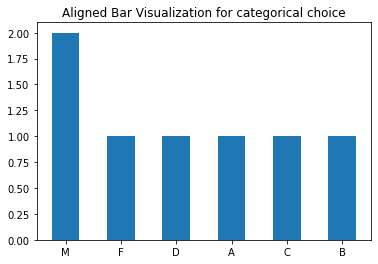

In [46]:
#table_visualization(new_pd.iloc[:,0])
aligned_bar_visualization(new_pd.iloc[:,0])
#new_pd.iloc[:,0]

In [112]:
# https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlibs
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot([0,1,2], [10,20,3])
fig.savefig('./1.png')   # save the figure to file
plt.close(fig)    # close the figure window


In [ ]:
"""
def preprocess_name(string):
    return string.split(" ")[0]

# All valid visualizations listed here.
# average: https://stackoverflow.com/questions/16689514/how-to-get-the-average-of-dataframe-column-values
# https://stackoverflow.com/questions/43725513/pandas-get-average-dataframe/43725615

# If categorical, count numbers of occurences for each 
def table_visualization(data, default='AVG', directory='my_visualization.png'):
    #df = pd.DataFrame(data)
    return_df = {}
    if(default == 'AVG'):
        data = data.mean(axis=0)
        data = pd.DataFrame([data])
    if(default == 'SUM'):
        data = data.sum(axis=0)
        data = pd.DataFrame([data])
    df_styled = data.style.background_gradient()
    dfi.export(df_styled, directory)
    return
    
#Done.
def aligned_bar_visualization(df, default='AVG', directory='my_visualization.png'):
    # https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
    # https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
    name_for_visualization = []
    data_for_visualization = []
    for i in range(0, len(df.columns)):
        new_name = preprocess_name(new_pd[df.columns[i]].name)
        name_for_visualization.append(new_name)
        if(default == 'AVG'):
             data_for_visualization.append(new_pd[df.columns[i]].mean())
        elif(default == 'SUM'):
            data_for_visualization.append(new_pd[df.columns[i]].sum())
        else:
            data_for_visualization.append(new_pd[df.columns[i]].mean())
    plt.title("Aligned Bar Visualization for " + default + " choice")
    plt.bar(name_for_visualization, data_for_visualization)
    #DO NOT SHOW IT!
    plt.savefig(directory)
    return directory

# SOURCE
# https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/bar_stacked.

def stacked_bar_visualization(df, default='AVG', directory='my_visualization.png'):
    new_name = preprocess_name(new_pd[df.columns[i]].name)
    men_means = [20, 35, 30, 35, 27]
    women_means = [25, 32, 34, 20, 25]
    men_std = [2, 3, 4, 1, 2]
    women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence
    
    fig, ax = plt.subplots()
    
    ax.bar(labels, men_means, width, label='Men')
    ax.bar(labels, women_means, width, bottom=men_means, label='Women')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.legend()
    plt.savefig(directory)
    return directory
   

## Currently only for 2 data
def scatter_plot_visualization(df, default='ALL', directory='my_visualization.png'):
    # Cannot deal with data too large of size
    markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
    if(get_type_number(df)[NUMERICAL] > 10):
        print("Error: Numerical CANNOT be more than 10 given the settings of the program\n Please filter the data.")
        return
    #https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
    if(len(df.index) > 10):
        print("Error: Number of rows CANNOT be more than 10 givne the settings of the program.")
        return
    markers = markers[0 : len(df.index)]
    for marker in :
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
    
    # if row more than 10: should not use it. Should print and then return error message.
"""